# <font size=5> Train competing methods on cross-platform datasets as following (only need to be run once):  </font>



In [ ]:
# cd competing_methods/
# !Rscript cellid.R
# !Rscript scclassify.R
# !Rscript SingleCellNet_SingleR_scmap_Seurat.R # including {SingleCellNet, scmap, SingleR, Seurat-CCA, Seurat-PCA}
# !Rscript SingleR_scmap_Seurat_on_mouse_brain.R # including {scmap, SingleR, Seurat-PCA} on big-data (mouse brain)
# !python scanvi.py
# !python scNym.py
# cd /competing_methods/scGCN/scGCN
# !bash run_scGCN_all.sh

# <font size=5> Train GraphCS on cross-platforms data </font>

In [5]:
f=open('cross-plaatforms.txt','w+')
f.close()
!bash run_cross-platforms.sh

pbmcsca_10x_Chromium_CEL-Seq2
[1] "pbmcsca_10x_Chromium_CEL-Seq2"
[1] "begin pre_process_data \n"
Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|---

test time: 0.3184058666229248
--------------------------
Test acc:0.894
--------------------------
pbmcsca_10x_Chromium_inDrops
[1] "pbmcsca_10x_Chromium_inDrops"
[1] "begin pre_process_data \n"
Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene va

**************************************************|
Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Warning message:
In dir.create("./process_data") : './process_data' already exists
computing PCA
    with n_comps=50
    finished (0:00:01)
computing batch balanced neighbors
/data2/users/zengys/anaconda3/envs/main/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later 

--------------------------
Namespace(alpha=0.05, batch=4096, bias='none', data='mouse_brain', dev=3, dropout=0, epochs=1000, gpus=[0], hidden=256, layer=2, lr=0.001, patience=5, rmax=1e-05, rrz=0.5, savepath=0, seed=20159, vat_lr=0.1)
mouse_brain pre-computation cost: 10.2573 s
over load data
Epoch:0010 train loss:0.265 | val acc:0.979736 | cost90.098
Epoch:0020 train loss:0.176 | val acc:0.980632 | cost181.641
Epoch:0030 train loss:0.156 | val acc:0.981240 | cost275.362
Epoch:0040 train loss:0.142 | val acc:0.981348 | cost367.886
Epoch:0050 train loss:0.133 | val acc:0.981579 | cost461.844
Train cost: 461.8438s
val time cost: 92.8849s
test time: 4.6934802532196045
--------------------------
Test acc:0.936
--------------------------


# <font size=5>Read results from GraphCS<font size>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from matplotlib import cm
from matplotlib.pyplot import MultipleLocator
base='./'
savepath="cross-platforms"

/data2/users/zengys/.conda/envs/zengys/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
with open('../'+savepath+'.txt','r+') as f:
    acc=[]
    for j in f:
        acc.append(float(j[:-1]))
    csv=pd.read_csv(base+savepath+'.csv',header=0,index_col=0)
    csv.loc['GraphCS']=acc
    csv.to_csv(savepath+'.csv')
    f.close()

# <font size=5>Plot Fig2b<font size>

In [5]:
def plot7(data_list, y_label, x_label, save_name="cross_platforms"):
    '''
        箱形图  跨平台和不同图
    :param data_list: 数据
    :param y_label: 纵轴标题
    :param x_label: 横轴标签
    :param save_name: 图片保存名称
    :return:
    '''
    weight='bold'
    
    colors_dict = {"scmap": "#8C564B",
                   "SingleCellNet": "#92D050",
                   "Seurat-CCA": "#00B0F0",
                   "Seurat-PCA": "#F59D56",
                   "SingleR": "#BFBFBF",
                   "scGCN": "#8B008B",
                   "GraphCS": "black",
                   "CHETAH": "#CC00FF",
                   "scPred": "#FF6699",
                   'scNym':'green',
                   'scANVI':'red',
                   'OnClass': 'gray',
                   "CelliD(C)": "cyan",
                   "CelliD(G)": "blue",
                   "scClassify": "#E74C3C"}

    figure, ax = plt.subplots()  # 得到画板、轴
    figure.set_size_inches((15,12))
    bplot1 = ax.boxplot(data_list,
                        #notch=True,
                        patch_artist=True,
                        showmeans=False,
                        showfliers=False,
                        meanprops=dict(marker='^',
                                       markeredgecolor='#694d9f',
                                       markerfacecolor='#694d9f')
                        )  # 描点上色

    for patch, color in zip(bplot1['boxes'], x_label):
        patch.set_facecolor(colors_dict[color])
    ax.set_ylim([0,1])
    ax.yaxis.grid(True)  # 在y轴上添加网格线
    ax.set_ylabel(y_label, labelpad=15, fontsize=33, fontweight=weight)  # 设置y轴名称
    xticks = range(len(x_label))
    xticks = [i + 1 for i in xticks]
    plt.setp(ax, xticks=xticks,
             xticklabels=x_label)
    # x = range(len(x_label))
    plt.xticks(rotation=30, fontsize=23,weight=weight,ha='right')
    plt.yticks(fontsize=25,weight=weight)
    plt.tight_layout()

    # 去右边框和上边框
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if weight:
        ax.spines['bottom'].set_linewidth(2)  ###设置底部坐标轴的粗细
        ax.spines['left'].set_linewidth(2)  ####设置左边坐标轴的粗细

    plt.savefig('./figures/{}.png'.format(save_name), dpi=400, format='png')
    plt.show()

Index(['CelliD(G)', 'Seurat-CCA', 'scmap', 'scClassify', 'scGCN', 'scANVI',
       'SingleR', 'CelliD(C)', 'SingleCellNet', 'Seurat-PCA', 'scNym',
       'GraphCS'],
      dtype='object')


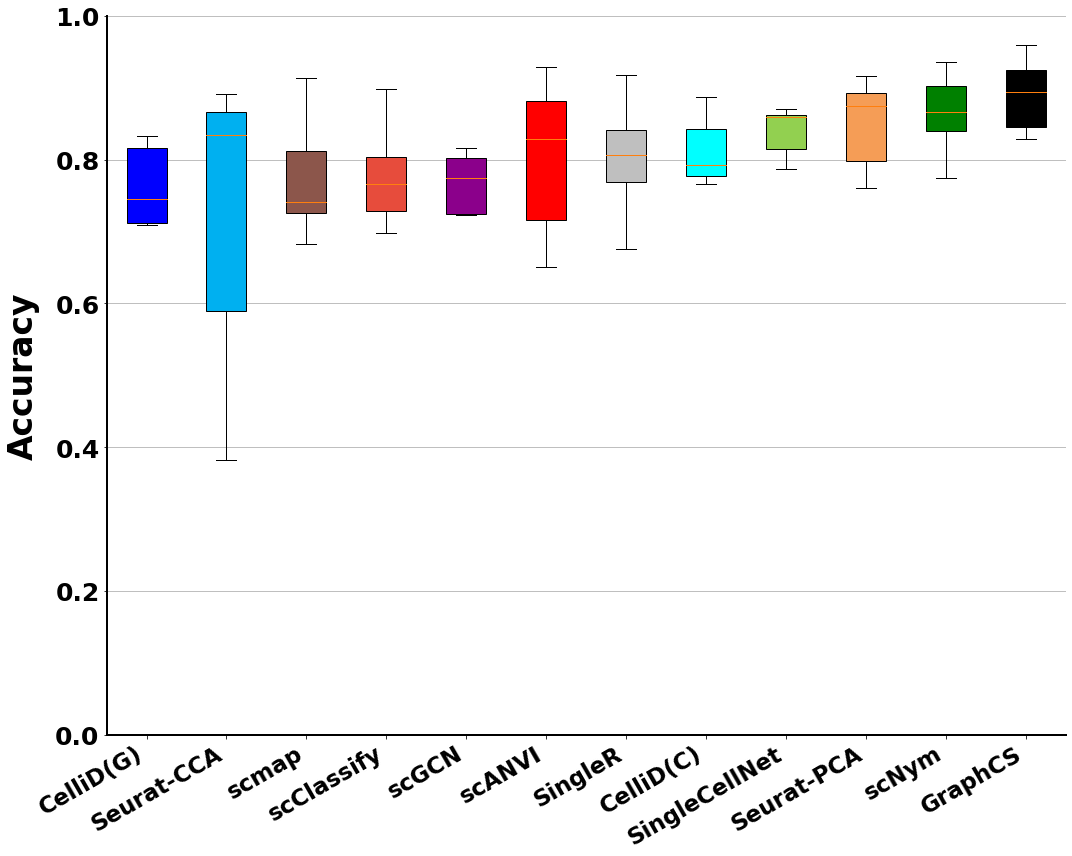

In [11]:
base='/data2/users/zengys/task_py/cross-platforms/'
df = pd.read_csv(base+"cross-platforms.csv", index_col=0, header=0)
df=df.drop(['OnClass','scPred','CHETAH'])
df['sort']=[np.mean(df.loc[i][df.loc[i]>0]) for i in df.index]
df=df.sort_values(by='sort', ascending=True)
data_list = df.iloc[:,:-1].to_numpy().T
y_title = "Accuracy"
x_label = df.index
print(x_label)
plot7(data_list, y_title, x_label)